In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'fitbit:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1041311%2F1752235%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240826%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240826T203616Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9ee179061c64b86ed004d80947844b108c4c0a5b1625e9b0ea3a58689511a2674dffffacfa871514f2330e32b9ba06e8c7166e2e8efa50a5d89e435abfaee401d35d96c1b4fa63187d299edaf197232343edd3dc0e90044fbf1751805bb60b5f6cf2c5017a032ad87a46bb6ff4474f4d4aee076cf9613a6b1c6ff6c6bf9c9292e45231047325a4f81bebabacb1c7b523376d58809d986dacd0e5cde6886600ec7b762e5e970a73d6a0f554a7a5f2bb4921a9b092326de1e7387b8406d457dffec88a9f18ab987f803bceeba992359b6559164bebd1089ffd883b3cf35450963b011246f47b535eb76db431bf5e6ddbd0b0b4028fa1b97023a4b1d9a1efe2183a'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: fitbit"
[1] "Downloaded and uncompressed: fitbit"
[1] "Data source import complete"


**Bellabeat is a high-tech manufacturer of health-focused products for women.**

***Bellabeat Products***

Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

Watch: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity,  sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.


Business Task: Identify insights based on consumers use of non bellabeat products. Then use those insights to improve bellabeat products.




In [2]:
#Loading necessary packages

library(tidyverse)
library(skimr)
library(janitor)
library(here)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(skimr): there is no package called ‘skimr’


I'm using data that is collected from Fitbit users.

In [4]:
#importing data

daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
daily_sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

***DATA CLEANING***

In [5]:
#renaming data columns

daily_activity <- rename(daily_activity,
                         id = "Id",
                         activity_date = "ActivityDate",
                         total_steps = "TotalSteps",
                         total_distance = "TotalDistance",
                         tracker_distance = "TrackerDistance",
                         logged_activity_distance = "LoggedActivitiesDistance",
                         very_active_distance = "VeryActiveDistance",
                         moderately_active_distance = "ModeratelyActiveDistance",
                         light_active_distance = "LightActiveDistance",
                         sedentary_active_distance = "SedentaryActiveDistance",
                         very_active_minutes = "VeryActiveMinutes",
                         fairly_active_minutes =  "FairlyActiveMinutes",
                         lightly_active_minutes  = "LightlyActiveMinutes",
                         sedentary_minutes = "SedentaryMinutes",
                         calories = "Calories" )

hourly_calories <- rename(hourly_calories,
                          id = "Id",
                          activity_hour =  "ActivityHour",
                          calories = "Calories" )

daily_sleep <- rename(daily_sleep,
                      id = "Id",
                      sleep_day = "SleepDay",
                      total_sleep_records = "TotalSleepRecords",
                      sleep_minute = "TotalMinutesAsleep",
                      bed_time = "TotalTimeInBed")

hourly_steps <- rename(hourly_steps,
                       id = "Id",
                       activity_hour = "ActivityHour",
                       total_steps_hr = "StepTotal")

Splitting "mm:dd:yyyy hh:mm:ss am/pm" to date and time by first converting it to posixct object and then using the format function.

In [6]:
hourly_calories$activity_hour <- as.POSIXct(hourly_calories$activity_hour, "%m/%d/%Y %I:%M:%S %p", tz = "")
hourly_calories$date <- format(hourly_calories$activity_hour, format = "%m/%d/%y")
hourly_calories$time <- format(hourly_calories$activity_hour, format = "%H:%M:%S")

daily_sleep$sleep_day <- as.POSIXct(daily_sleep$sleep_day, "%m/%d/%Y %I:%M:%S %p" , tz = "")
daily_sleep$date <- format(daily_sleep$sleep_day, format = "%m/%d/%Y")
daily_sleep$time <- format(daily_sleep$sleep_day, format = "%H:%M:%S")

hourly_steps$activity_hour <- as.POSIXct(hourly_steps$activity_hour, "%m/%d/%Y %I:%M:%S %p" , tz = "")
hourly_steps$date <- format(hourly_steps$activity_hour, format = "%m/%d/%Y")
hourly_steps$time <- format(hourly_steps$activity_hour, format = "%H:%M:%S")

In [7]:
#removing unwanted columns

daily_sleep <- select(daily_sleep, -c(sleep_day))
hourly_calories <- select(hourly_calories, -c(activity_hour))
hourly_steps <- select(hourly_steps, -c(activity_hour))


#counting NA values and removing them

daily_activity_null <- sum(is.na(daily_activity))
hourly_calories_null <- sum(is.na(hourly_calories))
daily_sleep_null <- sum(is.na(daily_sleep))
hourly_steps_null <- sum(is.na(hourly_steps)) # no null values were found


# ensuring that rows of all 4 dataframes are unique

daily_activity <- distinct(daily_activity)
daily_sleep <- distinct(daily_sleep)
hourly_calories <- distinct(hourly_calories)
hourly_steps <- distinct(hourly_steps)

We need to ensure that id's in all 4 dataframes are same.

For that first find the count of distinct id's in each dataframe. Then use length(intersect()) to find count of common id's in each dataframe. If both counts are same then  all 4 dataframes contain same id.

In [8]:
idcountactivity <- nrow(distinct(daily_activity,id))
print(idcountactivity)
idcountsleep <- nrow(distinct(daily_sleep,id))
print(idcountsleep)
idcountcalories <- nrow(distinct(hourly_calories,id))
print(idcountcalories)
idcountsteps <- nrow(distinct(hourly_steps,id))
print(idcountsteps)


length(intersect(daily_activity$id, daily_sleep$id))
length(intersect(daily_activity$id, hourly_calories$id))
length(intersect(daily_activity$id, hourly_steps$id))



[1] 33
[1] 24
[1] 33
[1] 33


[1] 24

[1] 33

[1] 33

All 3 dataframes except daily_sleep have 33 common unique id's. daily_sleep has only 24 common unique id's.

It is also evident that all 33 id's in daily_activity, hourly_steps,and hourly_steps are same and 24 id's of daily_sleep is common to all other dataframes.

In short the daily_sleep lacks 9 rows and it doesn't matter since we are analyzing each dataframe individually.



***DATA ANALYSIS***

In [9]:
#finding the average of each activity
activity <- daily_activity %>%
  summarise(very_min_avg  = mean(very_active_minutes),
            fair_min_avg  = mean(fairly_active_minutes),
            light_min_avg = mean(lightly_active_minutes),
            sedentary_min_avg  = mean(sedentary_minutes))

activity_long <- activity %>%            #converting the dataframe to long format
  pivot_longer(cols = c(very_min_avg, fair_min_avg, light_min_avg, sedentary_min_avg), names_to = "activity_type", values_to = "mean_minutes")

#finding the average calories burned in each hour
hourly_cal <- hourly_calories %>%
  group_by(time) %>%
  summarise(cal_avg = mean(calories))

#finding the steps took in each hour
hourly_step <- hourly_steps %>%
  group_by(time) %>%
  summarise(step_avg = mean(total_steps_hr))



***DATA VISUALIZATION***

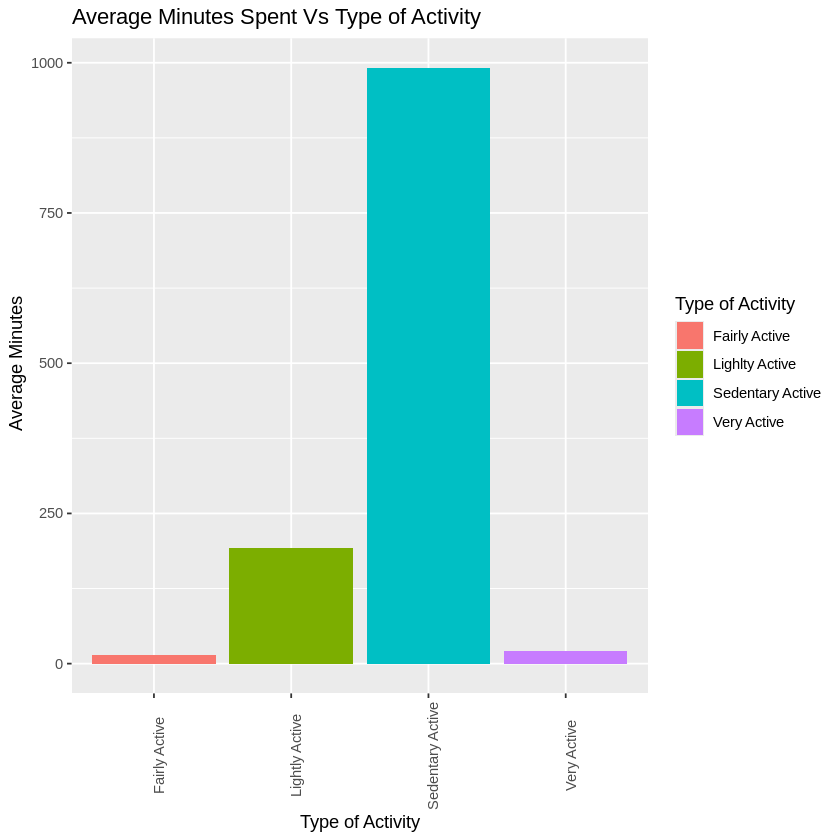

In [14]:
#Viz for type of activity

ggplot(data = activity_long)+
  geom_col(mapping = aes(x = activity_type, y = mean_minutes, fill = activity_type))+
  labs(title = "Average Minutes Spent Vs Type of Activity", x  = "Type of Activity", y = " Average Minutes", fill = "Type of Activity")+
  theme(axis.text.x = element_text(angle =90))+
  scale_x_discrete(labels = c("fair_min_avg" = "Fairly Active", "light_min_avg"  = "Lightly Active", "sedentary_min_avg" = "Sedentary Active",  "very_min_avg" = "Very Active"))+
  scale_fill_discrete(labels = c("Fairly Active", "Lighlty Active", "Sedentary Active", "Very Active"))


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


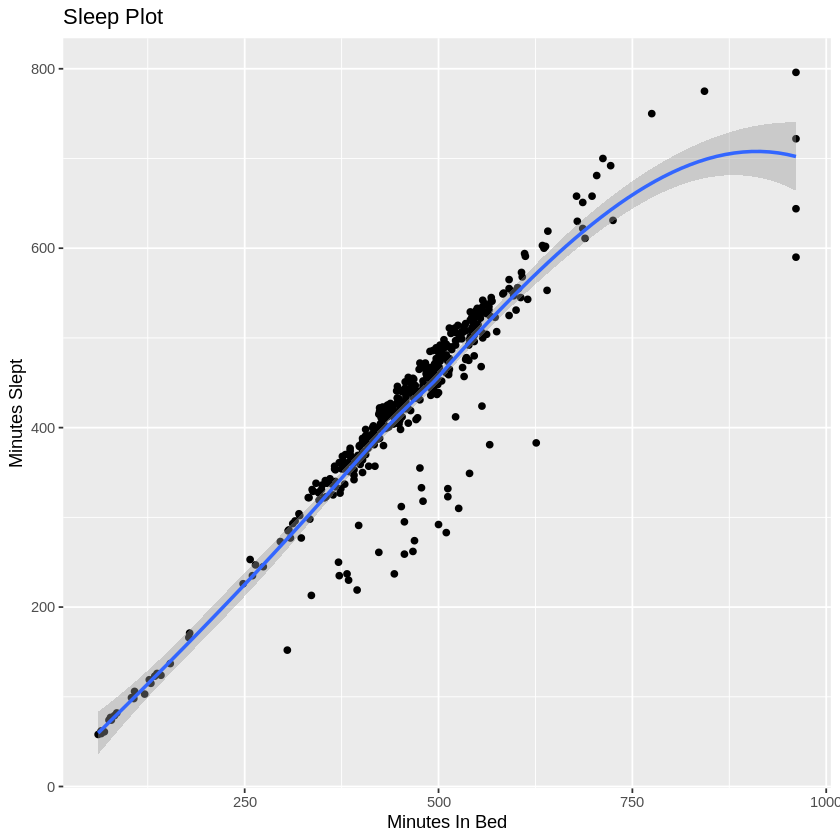

In [11]:
# Viz for time spent during sleeping

ggplot(data = daily_sleep)+
  geom_point(mapping = aes(x = bed_time, y = sleep_minute))+
  geom_smooth(mapping = aes(x = bed_time, y = sleep_minute))+
  labs(title = "Sleep Plot", x  = "Minutes In Bed" , y = "Minutes Slept")





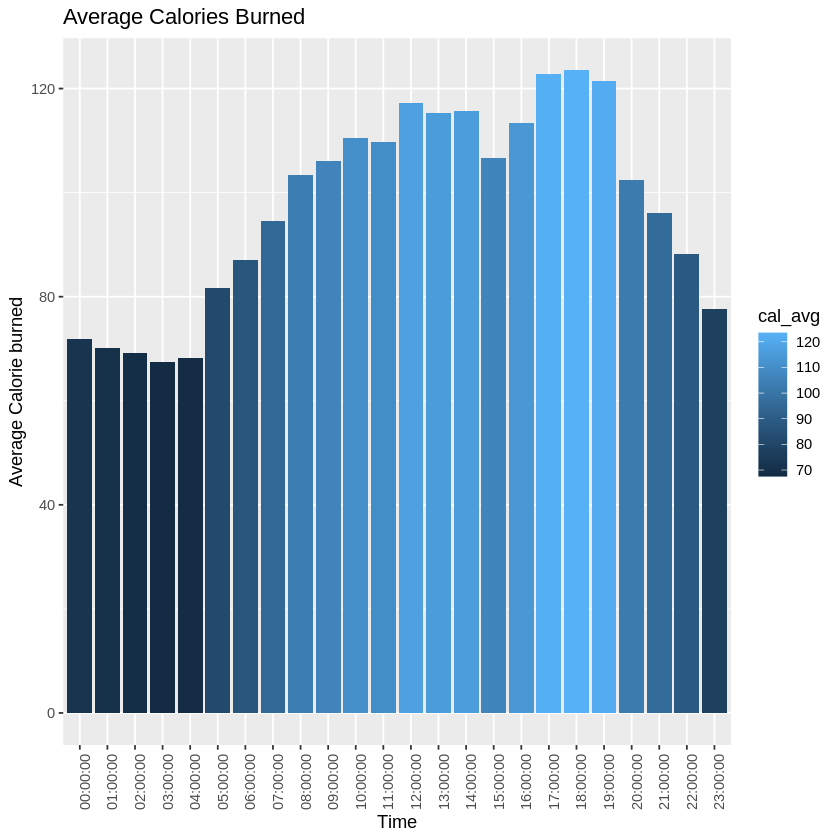

In [12]:
#Viz for average calories burned in each hour

ggplot(data = hourly_cal)+
  geom_col(mapping = aes(x = time, y = cal_avg,fill = cal_avg))+
  labs(title = "Average Calories Burned" , x = "Time" , y  = "Average Calorie burned")+
  theme(axis.text.x = element_text(angle = 90))


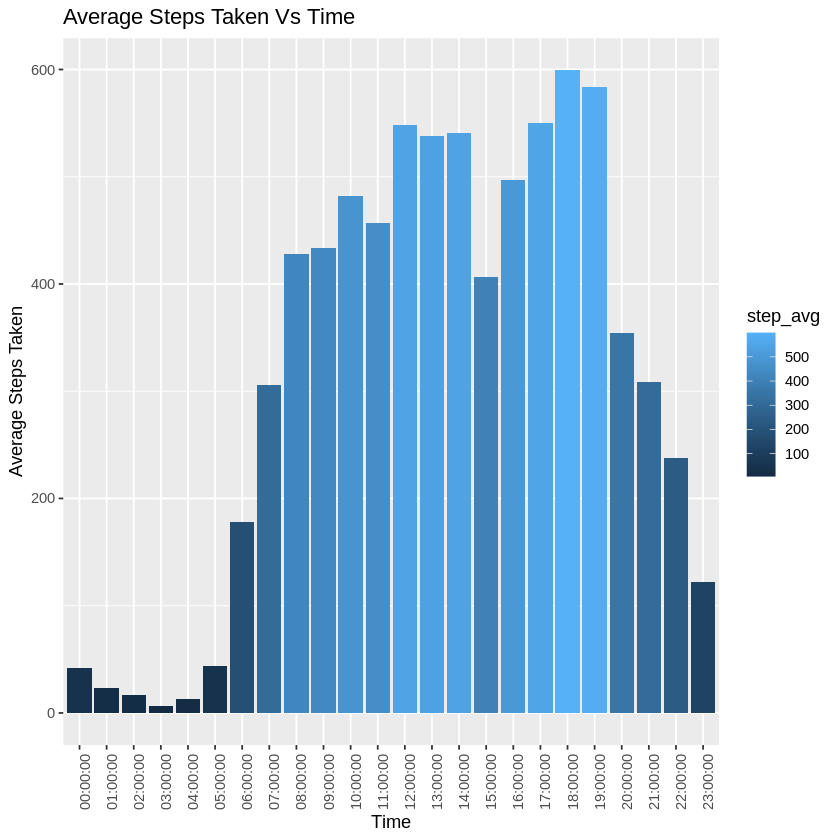

In [13]:
#Viz for average steps took in each hour

ggplot(data = hourly_step) +
  geom_col(mapping  = aes(x = time, y = step_avg, fill = step_avg))+
  labs(title = "Average Steps Taken Vs Time", x = "Time", y = "Average Steps Taken")+
  theme(axis.text.x = element_text(angle = 90))

**Recommendations**

From the 1st viz its evident that users spent very less time on fairly active activities and very active activities. They mostly prefer to be inactive or indulge in less active activities. ***A notification can be sent to the bellabeat app to remind users to be more active***.

From 2nd viz,  it seems that some users are getting less than 7 hours of sleep. For users who want to improve their sleep, ***a new feature can be added to bellabeat app that allows users to enter the time that they would need to wake up the next day. Based on their input, the app would calculate and inform them when they should prepare to sleep***. This would allow users to recognize how much sleep they have been receiving and ways to change that.

From the 3rd and 4th viz , there is a significant rise in calories burned and the steps took by users from 5:00 AM to all the way to 7:00 PM. But there is a dip in calories burned and steps took at 3:00 PM. This might be time were users are more tired and prefers to be less active.Also the calories burned and the steps took are almost consistent from 8:00 AM to 11: 00 AM. CDC recommends about 10,000 steps per day in order to be considered healthy and reduce mortality rate. So we can ***send a notification reminding users to walk more during timeframe 8 AM to 11 AM .***